# Kmeans after normalization

Normalization: "Median YOLKSAC BREADTH (mm)"; "Median Yolk sac area(mm2)"; "Median Eye area(mm2)" are divided by "Median length- mm". The results are the new values of features instead of the original.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline


In [2]:
data1 = pd.read_csv("./data/cluster 1.csv")
data1

,Unnamed: 0,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
0,0,Control Fish water,3.317,0.487,0.186,0.029,1
1,1,Control \n1% DMSO,3.394,0.451,0.182,0.034,1
2,2,C1,3.115,0.436,0.187,0.034,1
3,4,C3,3.327,0.419,0.198,0.031,1
4,5,C4,2.975,0.423,0.187,0.032,1
...,...,...,...,...,...,...,...
71,154,C153,3.237,0.511,0.242,0.032,1
72,157,C156,3.374,0.444,0.209,0.035,1
73,158,C157,3.375,0.392,0.180,0.029,1
74,159,C158,3.516,0.381,0.164,0.034,1


In [3]:
data = data1.drop(columns=["Unnamed: 0", "standard_clusters3"], axis=1)
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
0,Control Fish water,3.317,0.487,0.186,0.029
1,Control \n1% DMSO,3.394,0.451,0.182,0.034
2,C1,3.115,0.436,0.187,0.034
3,C3,3.327,0.419,0.198,0.031
4,C4,2.975,0.423,0.187,0.032
...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032
72,C156,3.374,0.444,0.209,0.035
73,C157,3.375,0.392,0.180,0.029
74,C158,3.516,0.381,0.164,0.034


## 1. Normalization

In [4]:
#Median YOLKSAC BREADTH Ratio = Median YOLKSAC BREADTH (mm)/Median length- mm
#Median Yolk sac area Ratio = Median Yolk sac area (mm)/Median length- mm
#Median Eye area Ratio = Median Eye area (mm)/Median length- mm
data["Median YOLKSAC BREADTH Ratio"] = data[["Median length- mm", "Median YOLKSAC BREADTH (mm)"]].apply(lambda x:x["Median YOLKSAC BREADTH (mm)"]/x["Median length- mm"],axis=1)
data["Median Yolk sac area Ratio"] = data[["Median length- mm", "Median Yolk sac area(mm2)"]].apply(lambda x:x["Median Yolk sac area(mm2)"]/x["Median length- mm"],axis=1)
data["Median Eye area Ratio"] = data[["Median length- mm", "Median Eye area(mm2)"]].apply(lambda x:x["Median Eye area(mm2)"]/x["Median length- mm"],axis=1)
# data.to_csv("./data/original data with ratio.csv")
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [5]:
ratio_data = data[["Median length- mm", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]]
ratio_data.to_csv("./data/ratio.csv")
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670


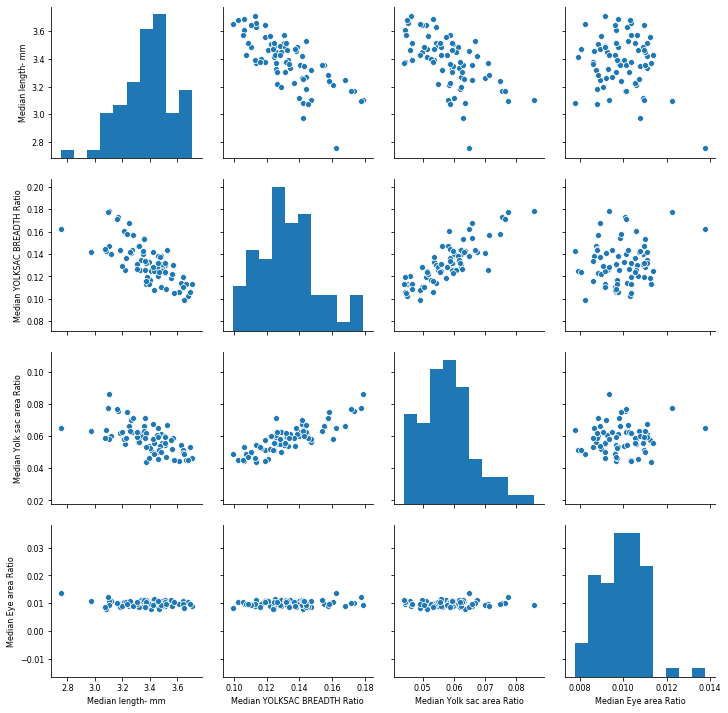

In [7]:
plt.rcParams['font.size'] = 8
sns.pairplot(ratio_data)
plt.savefig("./picture/pair_relationships_ratio.png", dpi=300)


## 2. Kmeans without dimensionality reduction

 **Silhouette Coefficient**

In [8]:
#try 2 clusters to 10 clusters and evaluate the scores.
scores = []
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(ratio_data).labels_
    score = metrics.silhouette_score(ratio_data, labels)
    scores.append(score)
    
scores

[0.5420773844059729,
 0.5006603599446414,
 0.5076599444098866,
 0.5240377779560849,
 0.5422421924593253,
 0.5071854438513476,
 0.487717790137761,
 0.4760839762743736]

Text(0, 0.5, 'Sihouette score')

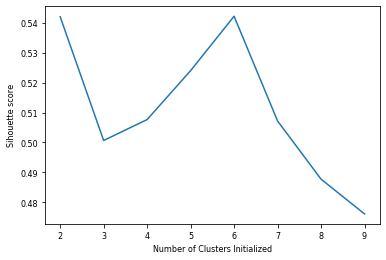

In [9]:
plt.plot(list(range(2,10)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette score")
# plt.savefig("./picture/Sihouette score.png", dpi=300)

From the Sihouette score we can know, the number 2 and 6 are the best number of cluters.

### The number of clusters is 2

In [10]:
kmeans2 = KMeans(n_clusters=2).fit(ratio_data)


In [11]:
data["clusters2"] = kmeans2.labels_

In [12]:
data.sort_values("clusters2").to_csv("./data/ratio_2clusters.csv")
data.sort_values("clusters2")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0
69,C151,3.304,0.418,0.207,0.034,0.126513,0.062651,0.010291,0
59,C126,3.256,0.463,0.206,0.035,0.142199,0.063268,0.010749,0
58,C123,3.165,0.542,0.242,0.032,0.171248,0.076461,0.010111,0
...,...,...,...,...,...,...,...,...,...
11,C13,3.420,0.485,0.231,0.038,0.141813,0.067544,0.011111,1
43,C78,3.574,0.377,0.160,0.037,0.105484,0.044768,0.010353,1
16,C27,3.526,0.508,0.236,0.036,0.144073,0.066931,0.010210,1
31,C54,3.689,0.391,0.196,0.036,0.105991,0.053131,0.009759,1


In [13]:
data.groupby("clusters2").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
clusters2,,,,,,,
0,3.190074,0.471556,0.205704,0.031741,0.148043,0.064543,0.009975
1,3.486796,0.431959,0.190102,0.034510,0.124098,0.054603,0.009898


In [14]:
#The numbers of samples in each cluster.
clustering_count = pd.DataFrame(data['Compound'].groupby(data['clusters2']).count()).T
clustering_ratio = (clustering_count / len(data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(clustering_count)
print("#"*30)
print("The percentage of each cluster:")
print(clustering_ratio)

The number of samples in each cluster:
clusters2   0   1
Compound   27  49
##############################
The percentage of each cluster:
clusters2     0     1
Compound   0.36  0.64


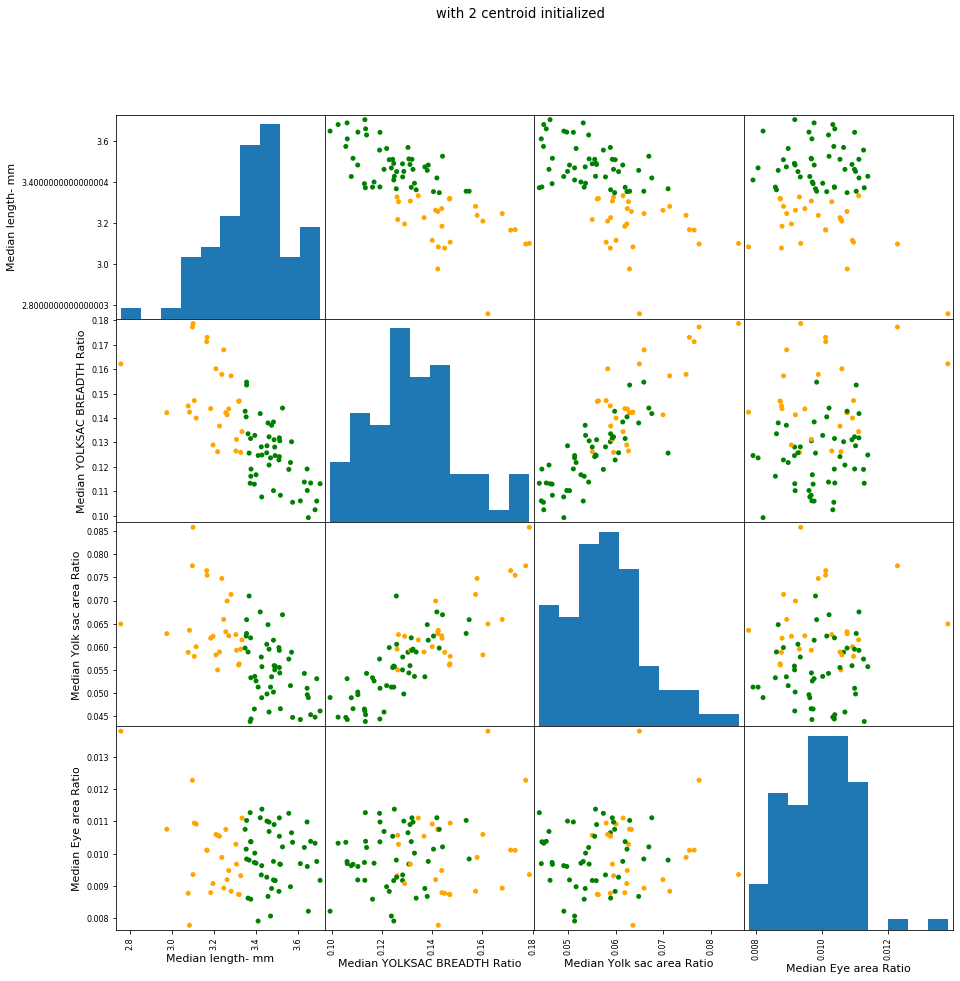

In [15]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'blue', 'yellow', 'black'])
scatter_matrix(data[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data["clusters2"]], figsize=(15,15))
plt.suptitle("with 2 centroid initialized")
plt.savefig("./picture/clustering with 2 clusters.png", dpi=300)

### The number of clusters is 6

In [16]:
kmeans6 = KMeans(n_clusters=6).fit(ratio_data)

In [17]:
data["clusters6"] = kmeans6.labels_
data.sort_values("clusters6").to_csv("./data/ratio_6clusters.csv")
data.sort_values("clusters6")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2,clusters6
16,C27,3.526,0.508,0.236,0.036,0.144073,0.066931,0.010210,1,0
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,1,0
47,C104,3.462,0.418,0.159,0.037,0.120739,0.045927,0.010687,1,0
27,C48,3.513,0.459,0.191,0.034,0.130658,0.054369,0.009678,1,0
48,C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,1,0
...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0,5
58,C123,3.165,0.542,0.242,0.032,0.171248,0.076461,0.010111,0,5
50,C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,0,5
46,C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,0,5


In [18]:
data.groupby("clusters6").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2
clusters6,,,,,,,,
0,3.480955,0.439909,0.194091,0.034409,0.126371,0.055749,0.009884,1.000000
1,3.360048,0.443333,0.193762,0.033143,0.131983,0.057684,0.009863,0.714286
2,3.079000,0.472000,0.205286,0.031143,0.153229,0.066649,0.010115,0.000000
3,3.634917,0.406000,0.179583,0.035833,0.111744,0.049422,0.009859,1.000000
4,2.756000,0.447000,0.179000,0.038000,0.162192,0.064949,0.013788,0.000000
5,3.224231,0.483615,0.212231,0.031462,0.150034,0.065833,0.009760,0.000000


In [19]:
clustering6_count = pd.DataFrame(data['Compound'].groupby(data['clusters6']).count()).T
clustering6_ratio = (clustering6_count / len(data)).round(2).rename({'counts':'percentage'})
clustering6_count
print("The number of samples in each cluster:")
print(clustering6_count)
print("#"*30)
print("The percentage of each cluster:")
print(clustering6_ratio)

The number of samples in each cluster:
clusters6   0   1  2   3  4   5
Compound   22  21  7  12  1  13
##############################
The percentage of each cluster:
clusters6     0     1     2     3     4     5
Compound   0.29  0.28  0.09  0.16  0.01  0.17


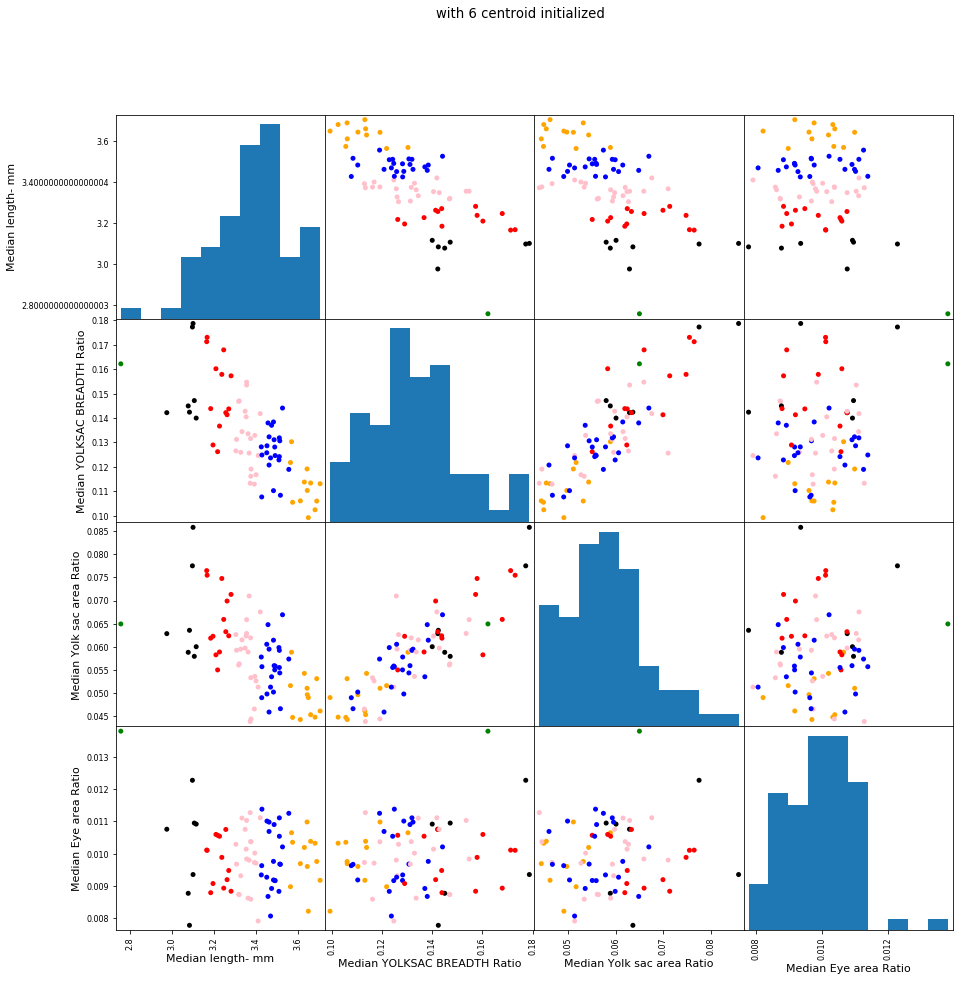

In [23]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'pink', 'black', 'orange', 'green', 'red'])
scatter_matrix(data[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data["clusters6"]], figsize=(15,15))
plt.suptitle("with 6 centroid initialized")
plt.savefig("./picture/clustering with 6 clusters.png", dpi=300)

## 3. KMeans with PCA

In [24]:
 from sklearn.decomposition import PCA

In [25]:
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670


In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ratio_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.065162,0.006905
1,-0.012689,-0.000661
2,0.266149,-0.013493
3,0.053763,-0.009715
4,0.405958,-0.021307
...,...,...
71,0.146264,0.018476
72,0.007395,0.000115
73,0.005015,-0.017393
74,-0.136309,-0.016160


**Silhouette Coefficient**

In [27]:
scores_pca = []
for k in range(2,10):
    labels_pca = KMeans(n_clusters=k).fit(principalComponents).labels_
    score_pca = metrics.silhouette_score(principalComponents, labels_pca)
    scores_pca.append(score_pca)
    
scores_pca

[0.5432167477253717,
 0.50275286183242,
 0.5106411098576186,
 0.5290109545354221,
 0.5472123729841721,
 0.5138228476937324,
 0.4799442380878407,
 0.48692835510029203]

Text(0, 0.5, 'Sihouette score')

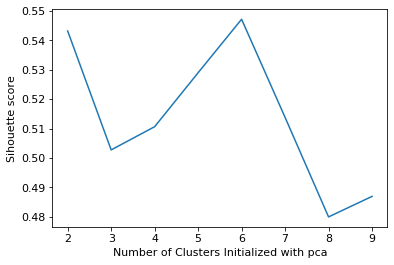

In [28]:
plt.plot(list(range(2,10)), scores_pca)
plt.xlabel("Number of Clusters Initialized with pca")
plt.ylabel("Sihouette score")

**After dimensionality reduction, Sihouette score shows 2 and 6 is better.**

### The number of clusters is 2

In [29]:
pca_kmeans2 = KMeans(n_clusters=2).fit(principalDf)


In [30]:
principalDf['pca_clusters2'] = pca_kmeans2.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2
0,0.065162,0.006905,0
1,-0.012689,-0.000661,1
2,0.266149,-0.013493,0
3,0.053763,-0.009715,0
4,0.405958,-0.021307,0
...,...,...,...
71,0.146264,0.018476,0
72,0.007395,0.000115,1
73,0.005015,-0.017393,1
74,-0.136309,-0.016160,1


In [33]:
pca2_data = pd.concat([data, principalDf], axis=1)
pca2_data = pca2_data.drop(columns = ["clusters2", "clusters6"], axis=1)
pca2_data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,-0.012689,-0.000661,1
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,0
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0.053763,-0.009715,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,0
...,...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476,0
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0.007395,0.000115,1
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0.005015,-0.017393,1
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,-0.136309,-0.016160,1


In [34]:
pca2_data.sort_values("pca_clusters2").to_csv("./data/ratio_pca_2clusters.csv")
pca2_data.sort_values("pca_clusters2")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,0
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476,0
69,C151,3.304,0.418,0.207,0.034,0.126513,0.062651,0.010291,0.076825,-0.009679,0
59,C126,3.256,0.463,0.206,0.035,0.142199,0.063268,0.010749,0.125844,0.000974,0
58,C123,3.165,0.542,0.242,0.032,0.171248,0.076461,0.010111,0.219071,0.025622,0
...,...,...,...,...,...,...,...,...,...,...,...
11,C13,3.420,0.485,0.231,0.038,0.141813,0.067544,0.011111,-0.037550,0.015325,1
43,C78,3.574,0.377,0.160,0.037,0.105484,0.044768,0.010353,-0.194393,-0.014990,1
16,C27,3.526,0.508,0.236,0.036,0.144073,0.066931,0.010210,-0.143074,0.025441,1
31,C54,3.689,0.391,0.196,0.036,0.105991,0.053131,0.009759,-0.308758,-0.001961,1


In [36]:
pca2_data.groupby("pca_clusters2").mean().to_csv("./data/mean_ratio_pca_2clusters.csv")
pca2_data.groupby("pca_clusters2").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
pca_clusters2,,,,,,,,,
0,3.190074,0.471556,0.205704,0.031741,0.148043,0.064543,0.009975,0.192029,0.001605
1,3.486796,0.431959,0.190102,0.034510,0.124098,0.054603,0.009898,-0.105812,-0.000884


In [37]:
pca_clustering2_count = pd.DataFrame(pca2_data['Compound'].groupby(pca2_data['pca_clusters2']).count()).T
pca_clustering2_ratio = (pca_clustering2_count / len(pca2_data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(pca_clustering2_count)
print("#"*30)
print("The percentage of each cluster:")
print(pca_clustering2_ratio)

The number of samples in each cluster:
pca_clusters2   0   1
Compound       27  49
##############################
The percentage of each cluster:
pca_clusters2     0     1
Compound       0.36  0.64


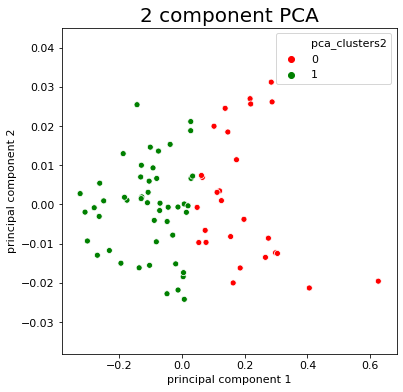

In [38]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters2'], palette = ['red', 'green'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_2clusters.png", dpi=300)
plt.show()


### The number of clusters is 6

In [39]:
pca_kmeans6 = KMeans(n_clusters=6).fit(principalComponents)


In [40]:
principalDf['pca_clusters6'] = pca_kmeans6.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2,pca_clusters6
0,0.065162,0.006905,0,3
1,-0.012689,-0.000661,1,3
2,0.266149,-0.013493,0,0
3,0.053763,-0.009715,0,3
4,0.405958,-0.021307,0,0
...,...,...,...,...
71,0.146264,0.018476,0,4
72,0.007395,0.000115,1,3
73,0.005015,-0.017393,1,3
74,-0.136309,-0.016160,1,1


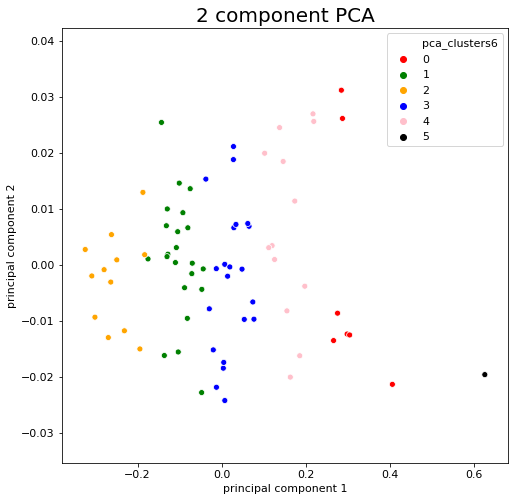

In [41]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters6'], palette = ['red', 'green', 'orange', 'blue', 'pink', 'black'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_6clusters", dpi=300)
plt.show()


In [42]:
pca6_data = pd.concat([data, principalDf], axis=1)
pca6_data = pca6_data.drop(columns = ["clusters2", "clusters6"], axis=1)

In [43]:
pca6_data.sort_values("pca_clusters6").to_csv("./data/ratio_pca_6clusters.csv")
pca6_data.sort_values("pca_clusters6")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2,pca_clusters6
15,C25,3.100,0.554,0.266,0.029,0.178710,0.085806,0.009355,0.284685,0.031193,0,0
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,0,0
34,C59,3.077,0.446,0.181,0.027,0.144946,0.058824,0.008775,0.304359,-0.012497,0,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,0,0
5,C5,3.083,0.439,0.196,0.024,0.142394,0.063574,0.007785,0.298326,-0.012327,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44,C89,3.226,0.441,0.190,0.034,0.136702,0.058896,0.010539,0.155222,-0.008195,0,4
45,C92,3.270,0.470,0.204,0.031,0.143731,0.062385,0.009480,0.111973,0.003084,0,4
46,C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,0.185653,-0.016204,0,4
50,C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,0.102257,0.019946,0,4


In [44]:
mean_pca6 = pca6_data.groupby("pca_clusters6").mean()
mean_pca6 = mean_pca6.drop(["pca_clusters2"], axis=1)
mean_pca6.to_csv("./data/mean_ratio_pca_6clusters.csv")
mean_pca6

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
pca_clusters6,,,,,,,,,
0,3.079000,0.472000,0.205286,0.031143,0.153229,0.066649,0.010115,0.303199,-0.001555
1,3.480955,0.439909,0.194091,0.034409,0.126371,0.055749,0.009884,-0.099789,0.001192
2,3.634917,0.406000,0.179583,0.035833,0.111744,0.049422,0.009859,-0.254528,-0.002583
3,3.360048,0.443333,0.193762,0.033143,0.131983,0.057684,0.009863,0.021209,-0.002429
4,3.224231,0.483615,0.212231,0.031462,0.150034,0.065833,0.009760,0.158162,0.006634
5,2.756000,0.447000,0.179000,0.038000,0.162192,0.064949,0.013788,0.625807,-0.019571


In [46]:
pca_clustering6_count = pd.DataFrame(pca6_data['Compound'].groupby(pca6_data['pca_clusters6']).count()).T
pca_clustering6_ratio = (pca_clustering6_count / len(pca6_data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(pca_clustering6_count)
print("#"*30)
print("The percentage of each cluster:")
print(pca_clustering6_ratio)

The number of samples in each cluster:
pca_clusters6  0   1   2   3   4  5
Compound       7  22  12  21  13  1
##############################
The percentage of each cluster:
pca_clusters6     0     1     2     3     4     5
Compound       0.09  0.29  0.16  0.28  0.17  0.01


In [157]:
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670
